# Proyecto: Predicción de Abandono de Clientes Bancarios

## Introducción a los Datasets

### Dataset 1: Predicción de Abandono de Clientes Bancarios (Bank Customer Churn)

**Descripción General:**
Este conjunto de datos contiene información sobre clientes de un banco y su comportamiento, con el objetivo de predecir si un cliente abandonará o no el banco (*churn*). La variable objetivo es `Exited`, que indica si el cliente dejó de ser parte del banco (`1`) o si permaneció (`0`).

**Características del Dataset (Variables relevantes):**
- `CustomerId`: Identificador único del cliente.
- `Surname`: Apellido del cliente.
- `CreditScore`: Puntuación de crédito del cliente.
- `Geography`: País de residencia (ej. Francia, España, Alemania).
- `Gender`: Género del cliente.
- `Age`: Edad del cliente.
- `Tenure`: Años de permanencia en el banco.
- `Balance`: Saldo promedio del cliente.
- `NumOfProducts`: Número de productos que el cliente tiene con el banco.
- `HasCrCard`: Indica si tiene tarjeta de crédito.
- `IsActiveMember`: Indica si el cliente es considerado activo.
- `EstimatedSalary`: Salario estimado del cliente.
- `Exited`: (Variable objetivo) `1` si el cliente se fue del banco, `0` si sigue.

**Objetivo del Proyecto:**
Analizar los factores que influyen en la decisión de un cliente de abandonar el banco. A partir de esto, se puede crear un modelo predictivo que ayude al banco a identificar clientes en riesgo y tomar medidas preventivas de retención.



## 1. Información General
- **Nombre del Proyecto**: 
- **Nombres del Equipo y Roles**:
  - José Villarreal - Lider Tecnico
  - Yohana banda - Lider BI
  - Justin Ureña - Analista
  - José Lara - Analista
  - Gabriela Vivas- Analista
- **Resumen del Proyecto**:
Este proyecto busca identificar los factores que influyen en el abandono de clientes usando modelos de analítica de negocios y aprendizaje automático.

## 2. Perspectiva del Negocio
- Contexto del problema y por qué es relevante en el entorno empresarial.
- Impacto potencial de las predicciones.
- Aplicaciones reales en la toma de decisiones.

## 3. Análisis Exploratorio de Datos
- Cargar dataset.
- Revisar estructura de datos.
- Estadísticas descriptivas.
- Visualización inicial.

In [53]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [54]:
#Cargar datos
df=pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 4. Preprocesamiento y Limpieza de Datos
- Identificación y manejo de valores nulos o duplicados.
- Transformaciones necesarias.
- Codificación y escalamiento si aplica.

In [55]:
# Preprocesamiento del dataset
# Verificar si hay valores nulos
null_values = df.isnull().sum()
# Verificar tipos de datos
data_types = df.dtypes

# Combinar resultados en un DataFrame para visualización como tabla
data_types = pd.DataFrame({
    'Column': df.columns,
    'Null Values': null_values.values,
    'Data Type': data_types.values
})

# Mostrar la tabla
data_types

,Column,Null Values,Data Type
0,RowNumber,0,int64
1,CustomerId,0,int64
2,Surname,0,object
3,CreditScore,0,int64
4,Geography,0,object
5,Gender,0,object
6,Age,0,int64
7,Tenure,0,int64
8,Balance,0,float64
9,NumOfProducts,0,int64


In [56]:
stats = df.describe().style.format(precision=2)
stats

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


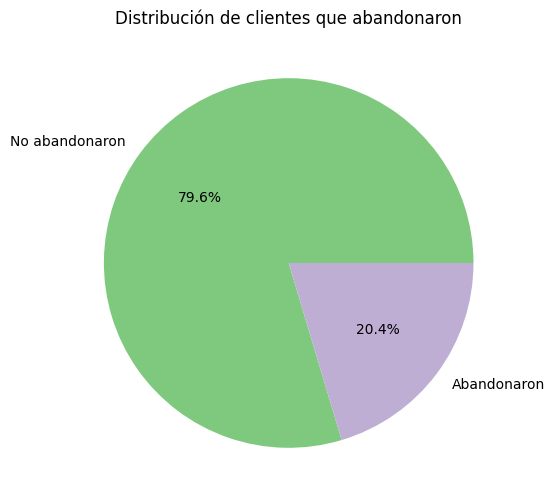

In [57]:
#Grafico de pastel para clientes que abandonan
# Contar los valores únicos de la columna "Exited"
conteo = df["Exited"].value_counts()

# Definir etiquetas personalizadas
labels = ["No abandonaron", "Abandonaron"]
palette = sns.color_palette("Accent", n_colors=2)
# Crear el gráfico
plt.figure(figsize=(6, 6))
plt.pie(
    conteo,
    labels=labels,  # Etiquetas manuales
    autopct="%1.1f%%",
    colors=palette
   
)
plt.title("Distribución de clientes que abandonaron")
plt.show()

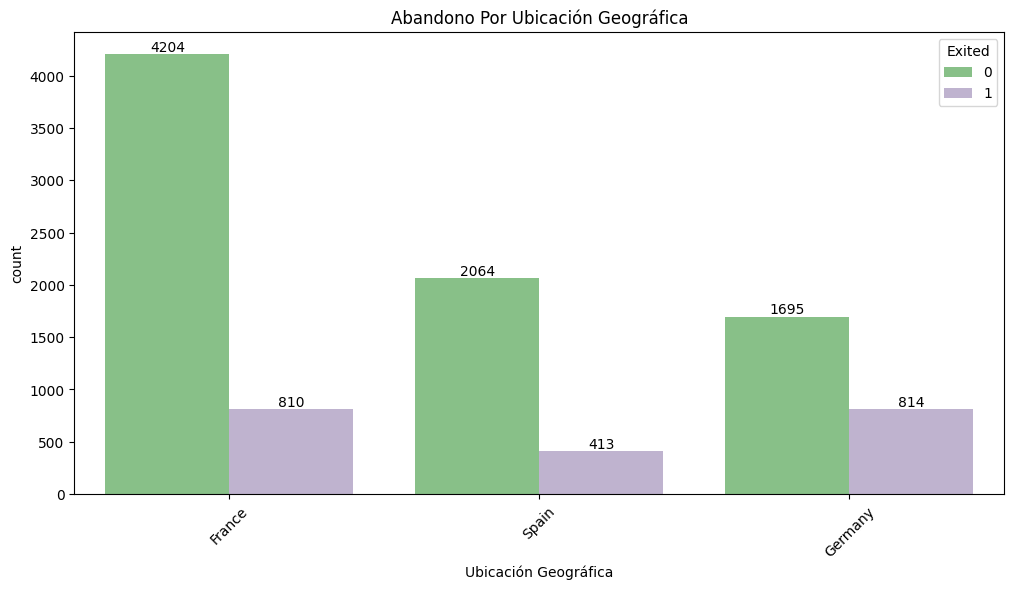

In [58]:
#Gráfico de Abandonos por ubicación geográfica
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Geography', hue='Exited', data=df, palette='Accent')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.title('Abandono Por Ubicación Geográfica')
plt.xlabel('Ubicación Geográfica')
plt.xticks(rotation=45)
plt.show()

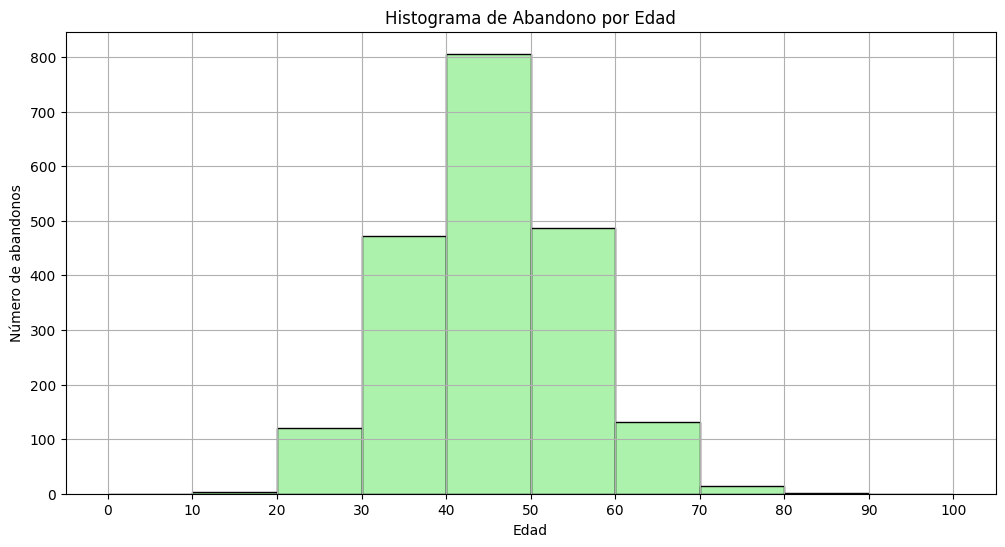

In [59]:
#Histograma por Edad 
#Gráfico de Abandonos por grupos de edad

# Crear grupos de edad
df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Filtrar solo los que abandonaron
exited_df = df[df['Exited'] == 1]

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=exited_df, x='Age', bins=range(0, 101, 10), color='lightgreen', kde=False)

plt.title('Histograma de Abandono por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de abandonos')
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.show()

C:\Users\Darki\AppData\Local\Temp\ipykernel_4144\416572936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y="Balance", data=df, palette="Accent")


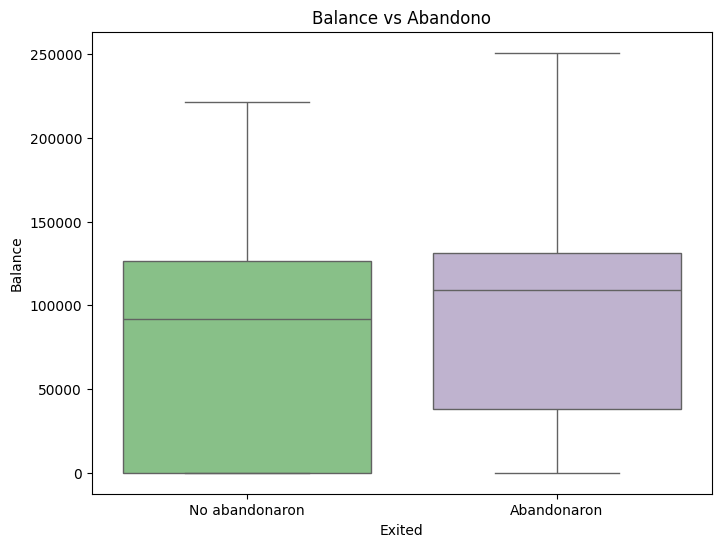

In [60]:
#Boxplot balance
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="Balance", data=df, palette="Accent")
plt.title("Balance vs Abandono")
plt.xticks([0, 1], ["No abandonaron", "Abandonaron"])
plt.show()


In [61]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [62]:
label_encoder=LabelEncoder()
df_encode=df.copy()
df_encode["Geography"]=label_encoder.fit_transform(df_encode["Geography"])
df_encode["Gender"]=label_encoder.fit_transform(df_encode["Gender"])
plt.figure(figsize=(12,6))
sns.heatmap(df_encode.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

ValueError: could not convert string to float: '40-49'

<Figure size 1200x600 with 0 Axes>

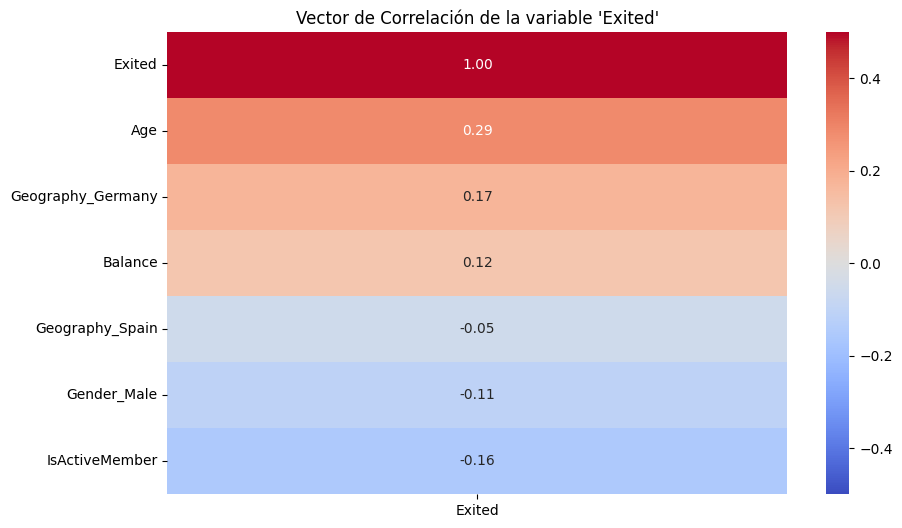

In [ ]:

df_encoded = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
plt.figure(figsize=(10, 6))
corr_matrix = df_encoded.corr(numeric_only=True)
target_corr = corr_matrix[["Exited"]].sort_values(by="Exited", ascending=False)

# Filtrar correlaciones con |r| >= 0.05 (umbral bajo para ver relaciones débiles)
target_corr = target_corr[(target_corr["Exited"] >= 0.05) | (target_corr["Exited"] <= -0.05)]

sns.heatmap(target_corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-0.5, vmax=0.5)
plt.title("Vector de Correlación de la variable 'Exited'")
plt.show()

## 5. Modelado Predictivo
- División de datos de entrenamiento y prueba.
- Selección de modelos.
- Entrenamiento y validación.

In [63]:
# Entrenamiento de modelos
# Random Forest - Yohana

In [ ]:
#Regresión Logistica - José Lara

In [ ]:
#Decisión Tree - Gabriela

In [ ]:
#Light GBM -Justin

In [ ]:
#KNN- José V

## 6. Evaluación del Modelo
- Métricas de evaluación.
- Interpretación de resultados.
- Ajustes necesarios.

In [ ]:
# Evaluación del modelo
a

## 7. Visualización de Resultados
- Crear visualizaciones relevantes.
- Mostrar resultados clave.

In [ ]:
# Visualizaciones finales
a

## 8. Conclusiones y Recomendaciones
- Conclusiones generales basadas en el análisis.
- Recomendaciones prácticas para el negocio.

## 9. Documentación Técnica
- Explicación de cómo ejecutar el proyecto paso a paso.
- Herramientas utilizadas con breve descripción y enlaces.
- Repositorio con código/documentación si aplica.

## 10. Recursos Adicionales
- Enlaces útiles.
- Lecturas recomendadas.
- Otros materiales de apoyo.